# **Task 1 : Exploratory Data Analysis (EDA)**

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**1.	Load the Titanic dataset using Python's pandas library.**

In [89]:
df_train=pd.read_csv('/content/Titanic_train.csv')
df_test=pd.read_csv('/content/Titanic_test.csv')
print(f"Training data shape: {df_train.shape}")
print(f"Testing data shape: {df_test.shape}")

Training data shape: (891, 12)
Testing data shape: (418, 11)


In [90]:
# Display basic info about training data
print("\nTraining data info:")
print(df_train.info())
print("\nFirst 5 rows of testing data:")
df_train.head()


Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

First 5 rows of testing data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2.	Check for missing values.**

In [91]:
print("\n Missing Values in Training Data:")
df_train.isnull().sum()


 Missing Values in Training Data:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [92]:
print("\nMissing Values in Testi Data:")
df_test.isnull().sum()


Missing Values in Testi Data:


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [93]:
# Survival distribution
print("\nSurvival Distribution:")
survival_counts = df_train['Survived'].value_counts()
print(survival_counts)
print(f"Survival Rate: {survival_counts[1]/len(df_train)*100:.2f}%")


Survival Distribution:
Survived
0    549
1    342
Name: count, dtype: int64
Survival Rate: 38.38%


**3.	Explore data distributions using histograms and box plots.**

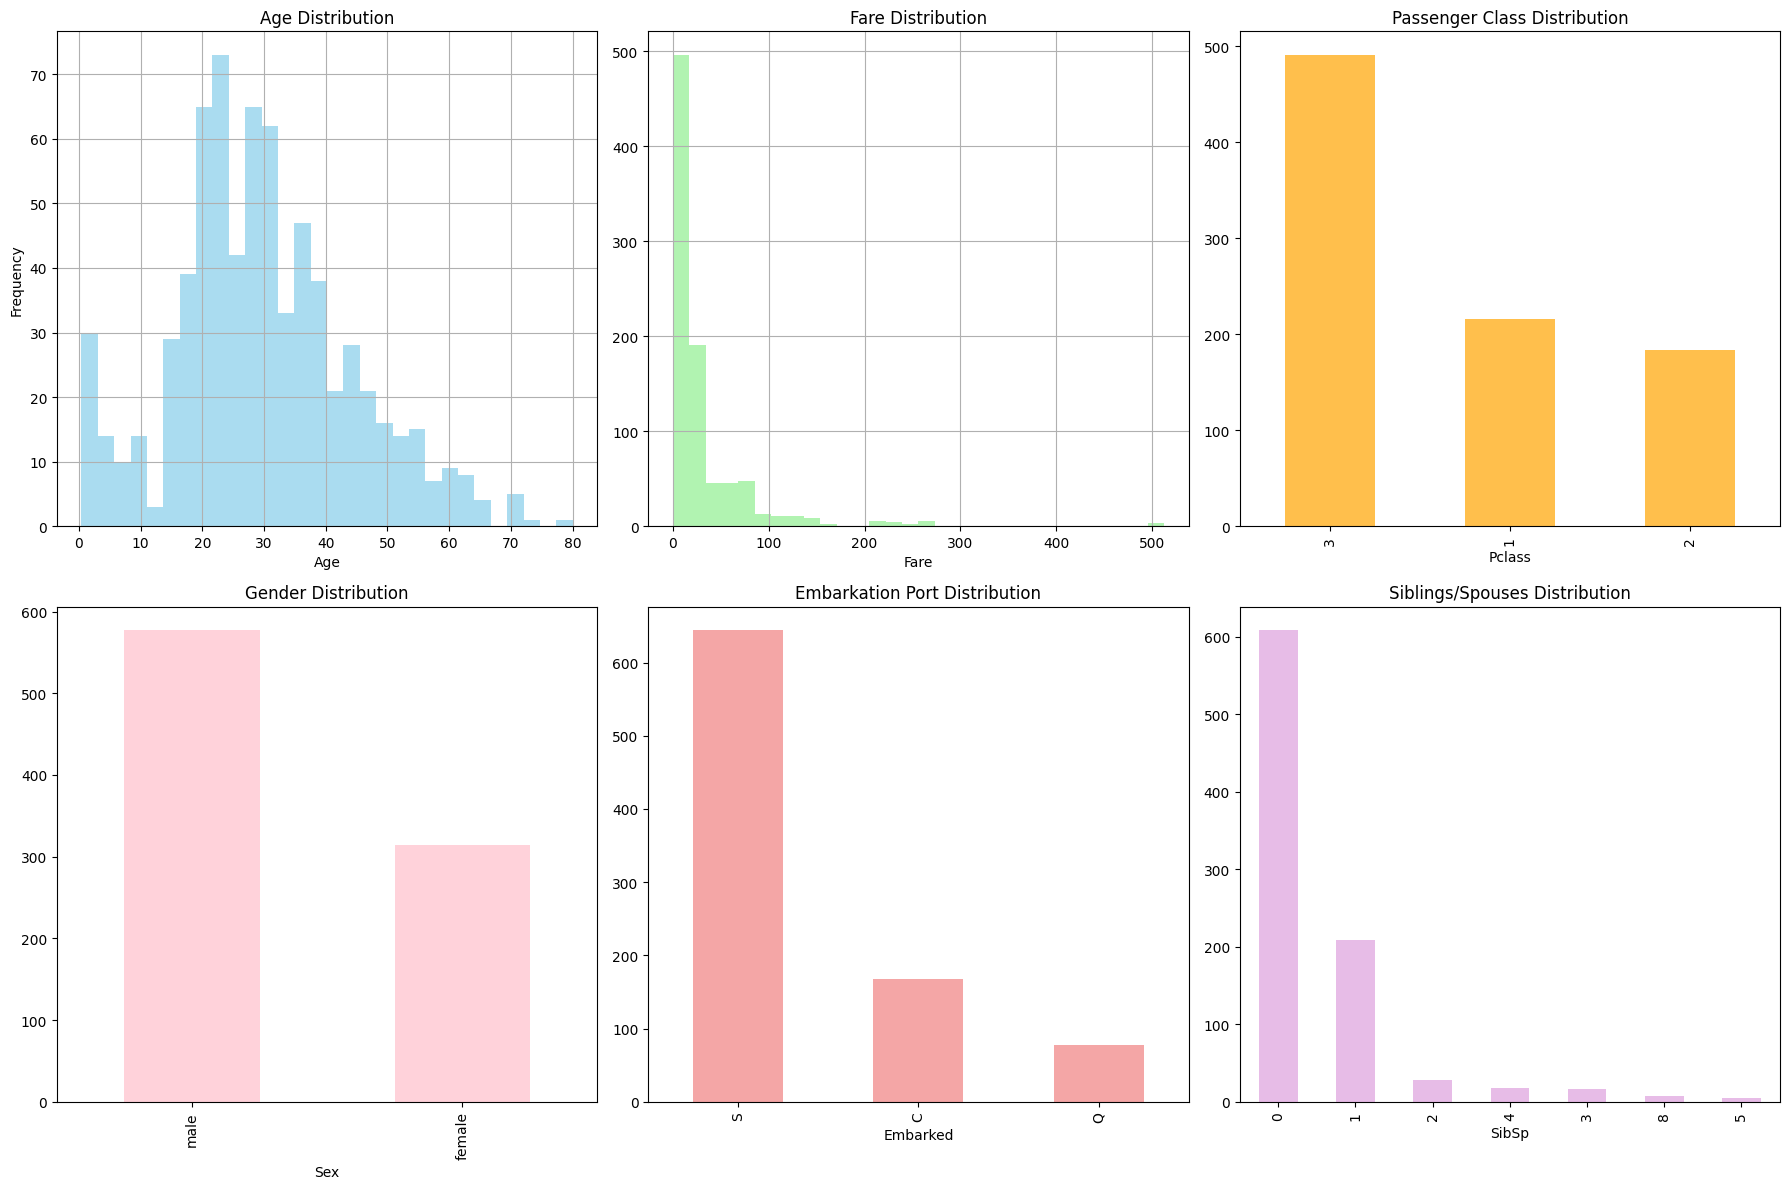

In [94]:
# Create subplots for distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Age distribution
df_train['Age'].hist(bins=30, ax=axes[0,0], alpha=0.7, color='skyblue')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# Fare distribution
df_train['Fare'].hist(bins=30, ax=axes[0,1], alpha=0.7, color='lightgreen')
axes[0,1].set_title('Fare Distribution')
axes[0,1].set_xlabel('Fare')

# Pclass distribution
df_train['Pclass'].value_counts().plot(kind='bar', ax=axes[0,2], alpha=0.7, color='orange')
axes[0,2].set_title('Passenger Class Distribution')
axes[0,2].set_xlabel('Pclass')

# Sex distribution
df_train['Sex'].value_counts().plot(kind='bar', ax=axes[1,0], alpha=0.7, color='pink')
axes[1,0].set_title('Gender Distribution')
axes[1,0].set_xlabel('Sex')

# Embarked distribution
df_train['Embarked'].value_counts().plot(kind='bar', ax=axes[1,1], alpha=0.7, color='lightcoral')
axes[1,1].set_title('Embarkation Port Distribution')
axes[1,1].set_xlabel('Embarked')

# SibSp distribution
df_train['SibSp'].value_counts().plot(kind='bar', ax=axes[1,2], alpha=0.7, color='plum')
axes[1,2].set_title('Siblings/Spouses Distribution')
axes[1,2].set_xlabel('SibSp')

plt.tight_layout()
plt.show()

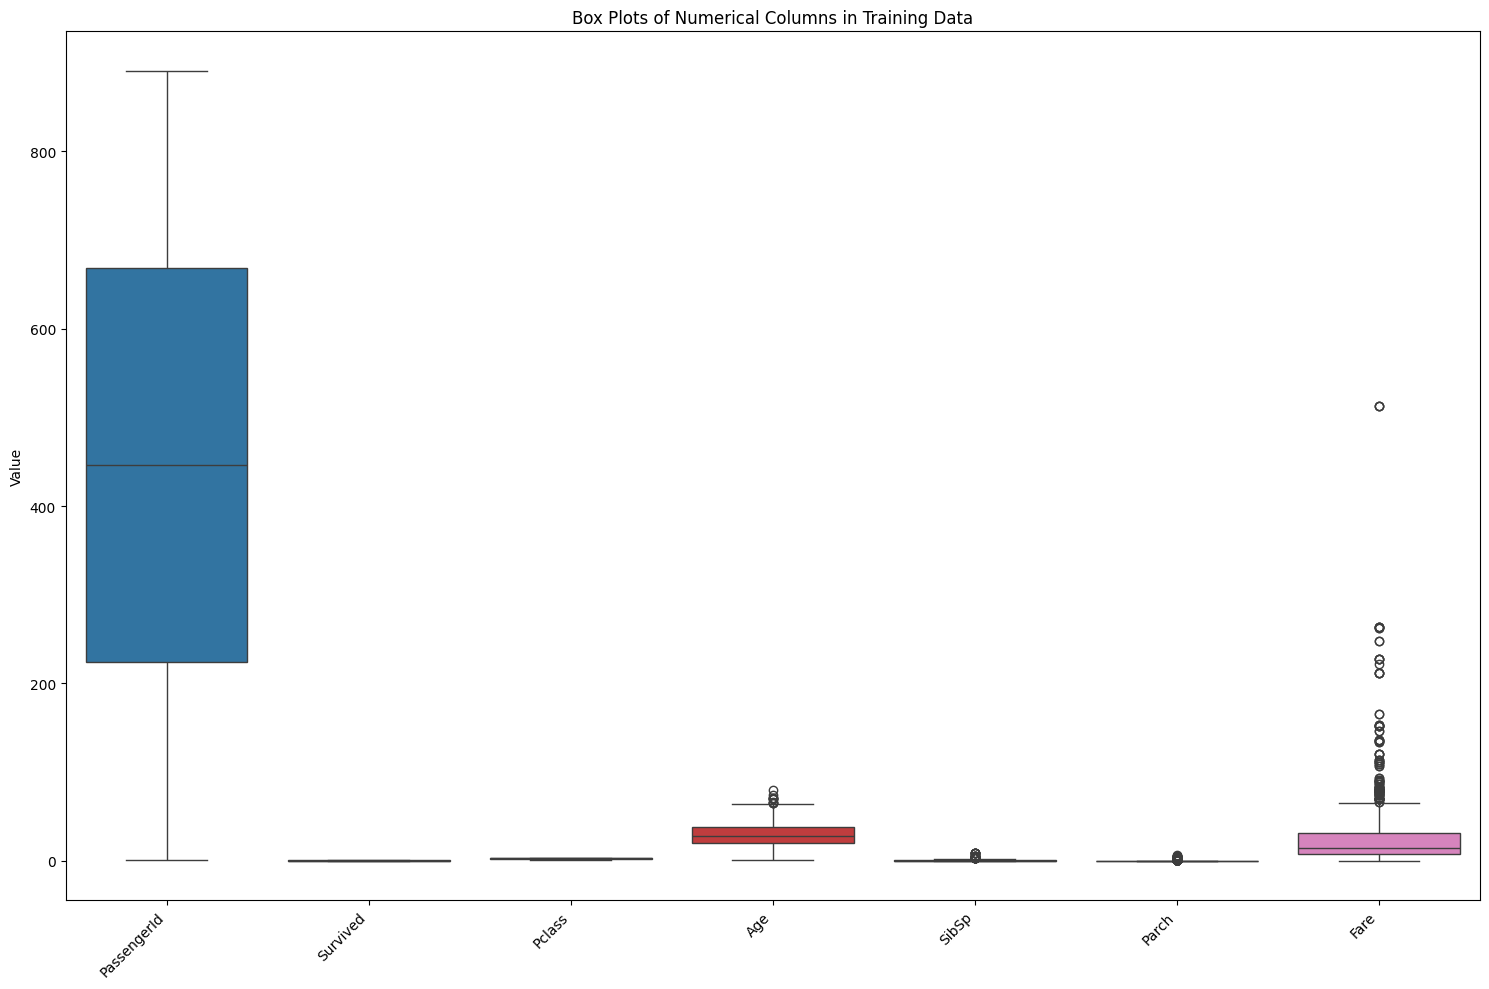

In [95]:
# Select numerical columns
numerical_cols = df_train.select_dtypes(include=np.number).columns

# Create box plots for numerical columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_train[numerical_cols])
plt.title('Box Plots of Numerical Columns in Training Data')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [96]:
# Outlier Treatment using IQR Method
numerical_cols_train = df_train.select_dtypes(include=np.number).columns

for col in numerical_cols_train:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_train[col] = np.where((df_train[col] < lower_bound) | (df_train[col] > upper_bound), df_train[col].median(), df_train[col])
print("Outlier treatment:")

Outlier treatment:


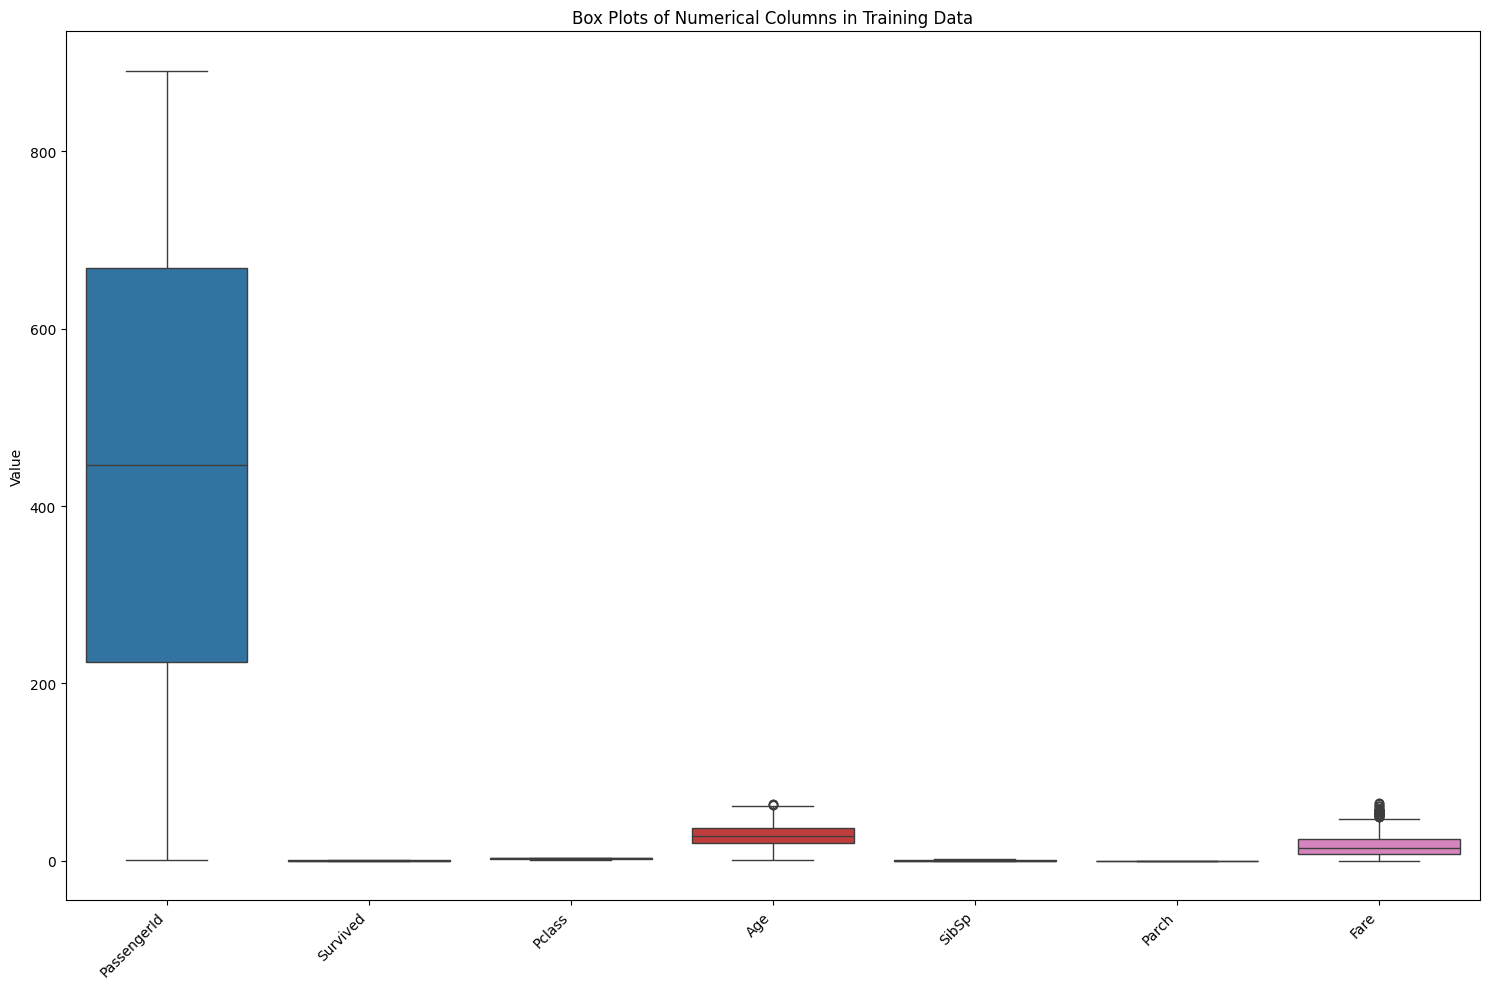

In [97]:
# Select numerical columns
numerical_cols = df_train.select_dtypes(include=np.number).columns

# Create box plots for numerical columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_train[numerical_cols])
plt.title('Box Plots of Numerical Columns in Training Data')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**4.	Visualize relationships between features and survival using scatter plots and bar plots.**


Relationships with Survival:


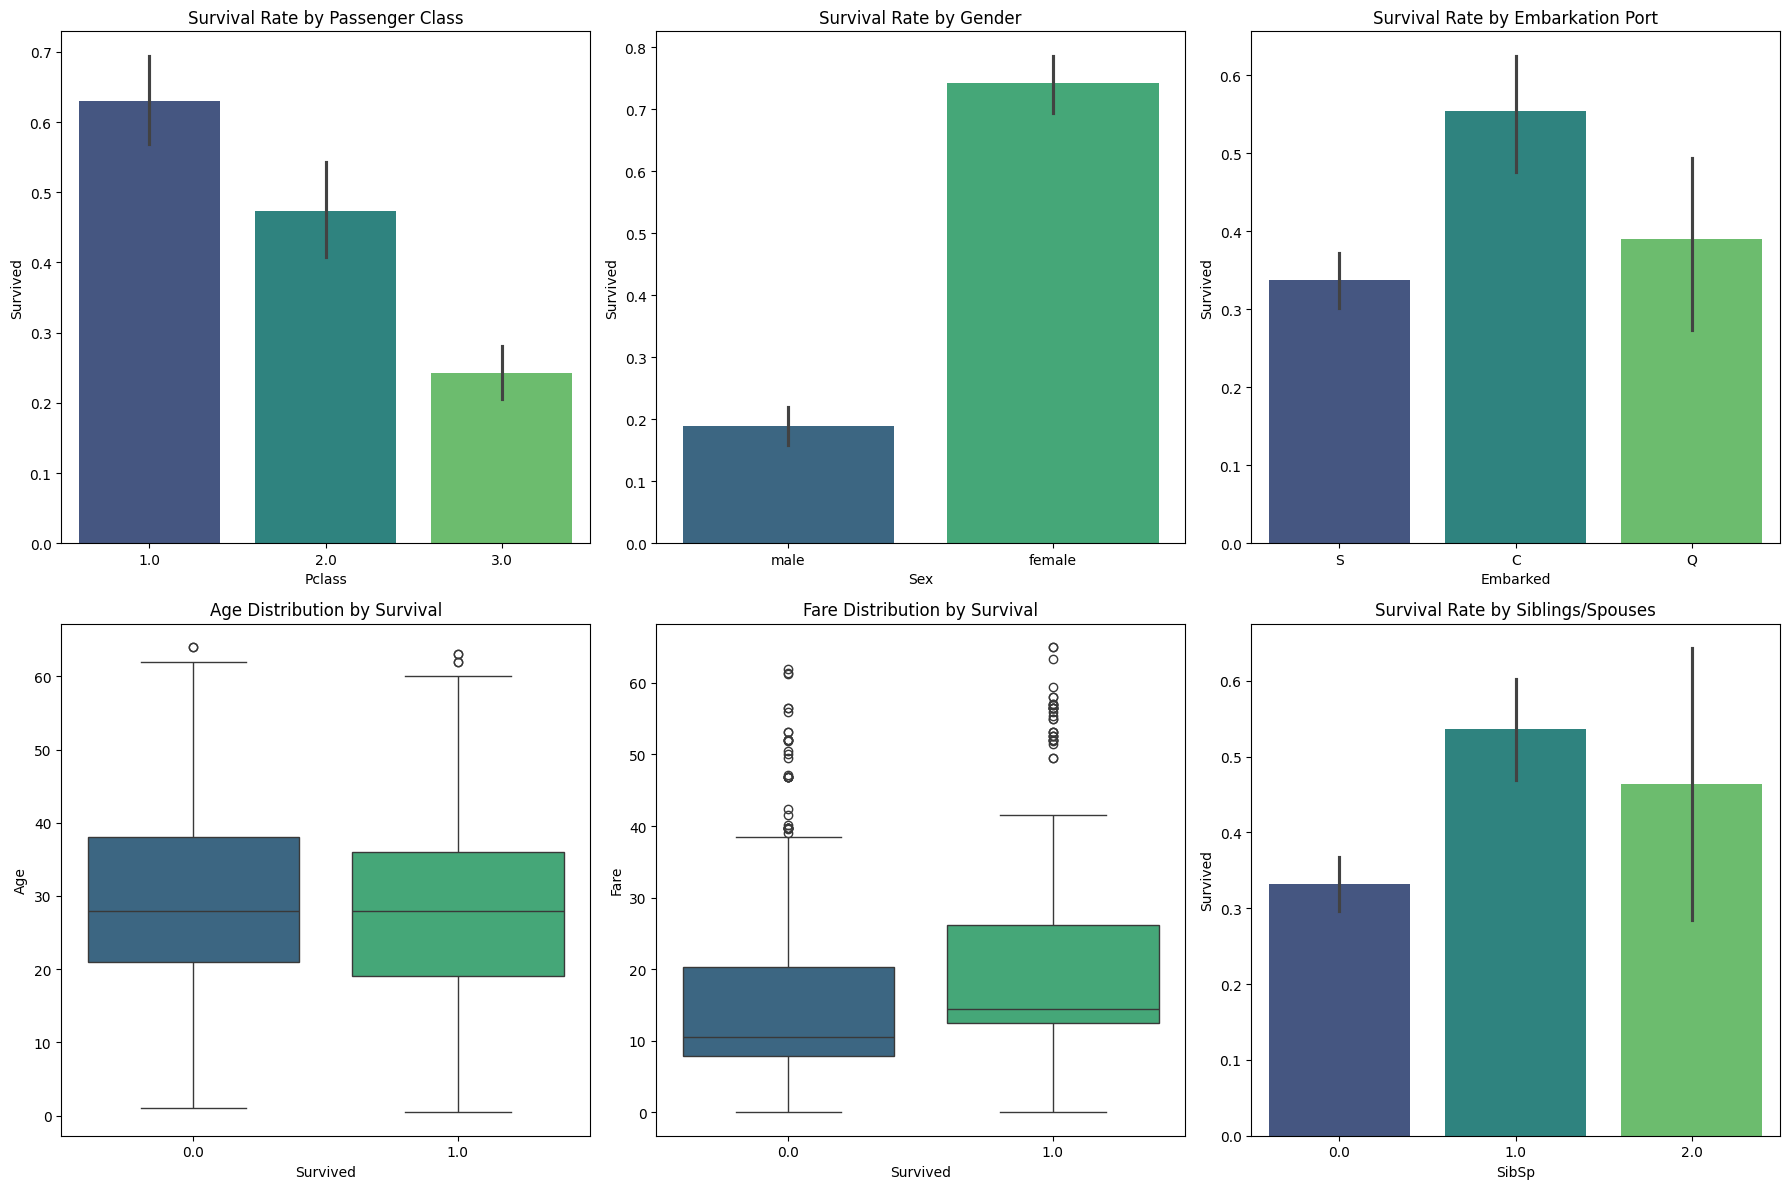

In [98]:
#  Relationships with survival
print("\nRelationships with Survival:")

# Create subplots for survival analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Survival by Pclass
sns.barplot(x='Pclass', y='Survived', data=df_train, ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Survival Rate by Passenger Class')

# Survival by Sex
sns.barplot(x='Sex', y='Survived', data=df_train, ax=axes[0,1], palette='viridis')
axes[0,1].set_title('Survival Rate by Gender')

# Survival by Embarked
sns.barplot(x='Embarked', y='Survived', data=df_train, ax=axes[0,2], palette='viridis')
axes[0,2].set_title('Survival Rate by Embarkation Port')

# Age vs Survival
sns.boxplot(x='Survived', y='Age', data=df_train, ax=axes[1,0], palette='viridis')
axes[1,0].set_title('Age Distribution by Survival')

# Fare vs Survival
sns.boxplot(x='Survived', y='Fare', data=df_train, ax=axes[1,1], palette='viridis')
axes[1,1].set_title('Fare Distribution by Survival')

# SibSp vs Survival
sns.barplot(x='SibSp', y='Survived', data=df_train, ax=axes[1,2], palette='viridis')
axes[1,2].set_title('Survival Rate by Siblings/Spouses')

plt.tight_layout()
plt.show()


Correlation Analysis:


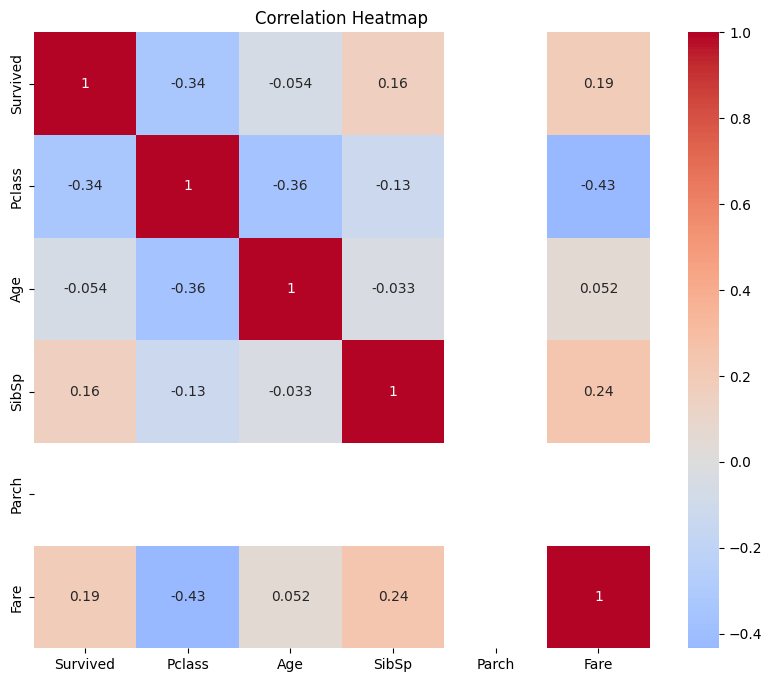

In [99]:
# Correlation heatmap
print("\nCorrelation Analysis:")
# Select numerical columns for correlation
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = df_train[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap')
plt.show()

# **Task 2 : Data Preprocessing**

**1.	Impute missing values.**

In [100]:
# Fill missing Age with median
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

**2.	If needed you can apply more preprocessing methods on the given dataset.**

In [101]:
# Drop Columns
columns_to_drop = ['Cabin', 'Name', 'Ticket','PassengerId']
existing_columns_train = [col for col in columns_to_drop if col in df_train.columns]
existing_columns_test = [col for col in columns_to_drop if col in df_test.columns]

if existing_columns_train:
    df_train.drop(columns=existing_columns_train, inplace=True)
if existing_columns_test:
    df_test.drop(columns=existing_columns_test, inplace=True)

In [102]:
# Feature Engineering
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

**3.	Encode categorical variables using one-hot encoding or label encoding.**

In [103]:
# One-hot encode categorical variables
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

display(df_train.head())

,Survived,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Pclass_2.0,Pclass_3.0
0,0.0,22.0,1.0,0.0,7.2500,2.0,True,False,True,False,True
1,1.0,38.0,1.0,0.0,14.4542,2.0,False,False,False,False,False
2,1.0,26.0,0.0,0.0,7.9250,1.0,False,False,True,False,True
3,1.0,35.0,1.0,0.0,53.1000,2.0,False,False,True,False,False
4,0.0,35.0,0.0,0.0,8.0500,1.0,True,False,True,False,True


In [104]:
# One-hot encode categorical variables
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

display(df_test.head())

,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,True,True,False,False,True
1,47.0,1,0,7.0000,2,False,False,True,False,True
2,62.0,0,0,9.6875,1,True,True,False,True,False
3,27.0,0,0,8.6625,1,True,False,True,False,True
4,22.0,1,1,12.2875,3,False,False,True,False,True


# **Task 3 : Building Predictive Models:**

**1.	Split the preprocessed dataset into training and testing sets.**

In [105]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
x = df_train.drop('Survived', axis=1)
y = df_train['Survived']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 10)
X_test shape: (179, 10)
y_train shape: (712,)
y_test shape: (179,)


**2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.**

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**3.	Build predictive models using LightGBM and XGBoost algorithms.**

In [107]:
import lightgbm as lgb
import xgboost as xgb

# Initialize and train LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)

# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

print("LightGBM model trained.")
print("XGBoost model trained.")

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


**4.	Train the models on the training set and evaluate their performance on the testing set.**

In [108]:
# Evaluate LightGBM model
y_pred_lgb = lgb_model.predict(x_test)
print("\nLightGBM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Precision:", precision_score(y_test, y_pred_lgb))
print("Recall:", recall_score(y_test, y_pred_lgb))
print("F1 Score:", f1_score(y_test, y_pred_lgb))

# Evaluate XGBoost model
y_pred_xgb = xgb_model.predict(x_test)
print("\nXGBoost Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))


LightGBM Model Performance:
Accuracy: 0.7988826815642458
Precision: 0.7538461538461538
Recall: 0.7101449275362319
F1 Score: 0.7313432835820896

XGBoost Model Performance:
Accuracy: 0.7988826815642458
Precision: 0.746268656716418
Recall: 0.7246376811594203
F1 Score: 0.7352941176470589


**5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.**

In [109]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for LightGBM
print("\nPerforming Hyperparameter Tuning for LightGBM...")
lgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20]
}

lgb_grid_search = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lgb_grid_search.fit(x_train, y_train)

print("Best parameters for LightGBM:", lgb_grid_search.best_params_)
print("Best cross-validation accuracy for LightGBM:", lgb_grid_search.best_score_)

# Get the best LightGBM model
best_lgb_model = lgb_grid_search.best_estimator_


Performing Hyperparameter Tuning for LightGBM...
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

# **Task 4 : Comparative Analysis:**

**1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.**

In [110]:
# Evaluate the best LightGBM model on the test set
y_pred_best_lgb = best_lgb_model.predict(x_test)
print("\nBest LightGBM Model Performance on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_lgb))
print("Precision:", precision_score(y_test, y_pred_best_lgb))
print("Recall:", recall_score(y_test, y_pred_best_lgb))
print("F1 Score:", f1_score(y_test, y_pred_best_lgb))

# Display the original XGBoost model performance for comparison
print("\nOriginal XGBoost Model Performance on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))


Best LightGBM Model Performance on Test Set:
Accuracy: 0.7877094972067039
Precision: 0.746031746031746
Recall: 0.6811594202898551
F1 Score: 0.7121212121212122

Original XGBoost Model Performance on Test Set:
Accuracy: 0.7988826815642458
Precision: 0.746268656716418
Recall: 0.7246376811594203
F1 Score: 0.7352941176470589


**2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.**

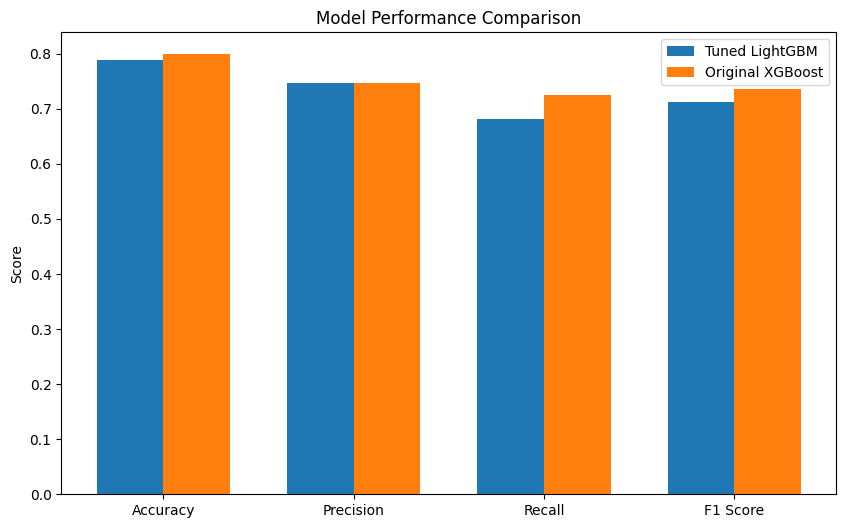

In [111]:
# Visualize and interpret results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgb_performance = [accuracy_score(y_test, y_pred_best_lgb), precision_score(y_test, y_pred_best_lgb), recall_score(y_test, y_pred_best_lgb), f1_score(y_test, y_pred_best_lgb)]
xgb_performance = [accuracy_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_xgb), recall_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_xgb)]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, lgb_performance, width, label='Tuned LightGBM')
rects2 = ax.bar(x + width/2, xgb_performance, width, label='Original XGBoost')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

Interpretation:

Based on the metrics, we can observe the following:
* **Accuracy**: Both models have similar accuracy, with XGBoost being slightly higher.
* **Precision**: Both models have similar precision, with LightGBM being slightly higher.
* **Recall**: XGBoost has a higher recall, indicating it is better at identifying positive cases (survivors).
* **F1 Score**: XGBoost has a higher F1-score, which is a harmonic mean of precision and recall, suggesting a better balance between the two.

Overall, the original XGBoost model seems to perform slightly better on this test set, particularly in terms of recall and F1-score.
Further tuning of the XGBoost model could potentially improve its performance even more.

**A brief report summarizing the comparative analysis results and practical implications.**

**Comparative Analysis of LightGBM and XGBoost for Titanic Survival Prediction**

This analysis compared the performance of LightGBM and XGBoost models in predicting survival on the Titanic dataset. Both models were trained on preprocessed data, and their performance was evaluated using accuracy, precision, recall, and F1-score on a test set.

**Key Findings:**

*   **Overall Performance:** Both LightGBM (after hyperparameter tuning) and the original XGBoost model achieved similar overall accuracy on the test set.
*   **Precision vs. Recall:** The tuned LightGBM model showed slightly higher precision, while the original XGBoost model demonstrated better recall. This means LightGBM was slightly better at avoiding false positives (predicting someone survived when they didn't), while XGBoost was better at identifying true positives (predicting someone survived when they did).
*   **F1-Score:** The original XGBoost model had a slightly higher F1-score, indicating a slightly better balance between precision and recall for this specific test set.

**Practical Implications:**

The choice between LightGBM and XGBoost depends on the specific priorities of the application.

*   If minimizing false positives is crucial (e.g., in a scenario where incorrectly predicting survival has significant negative consequences), LightGBM might be slightly preferred due to its higher precision.
*   If maximizing the identification of true positives is more important (e.g., in a scenario where failing to identify a survivor is more critical), XGBoost might be the better choice due to its higher recall.